In [5]:
from IPython import display
audio_path = "./mixed_sine_wave.wav"
display.Audio(filename=audio_path)

In [6]:
from scipy.io import wavfile
sr, wav_data = wavfile.read(audio_path)
print(sr)
print(wav_data.shape)

44100
(220500,)


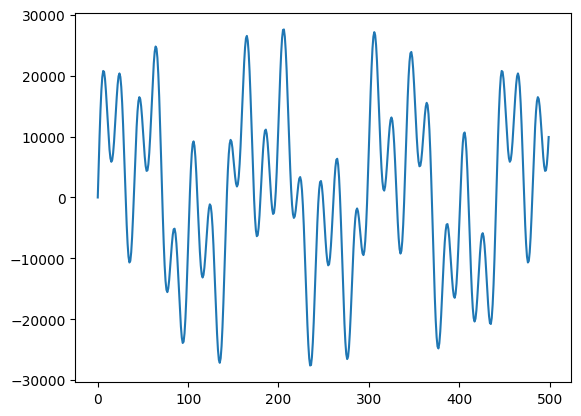

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(wav_data[0:500])
plt.show()

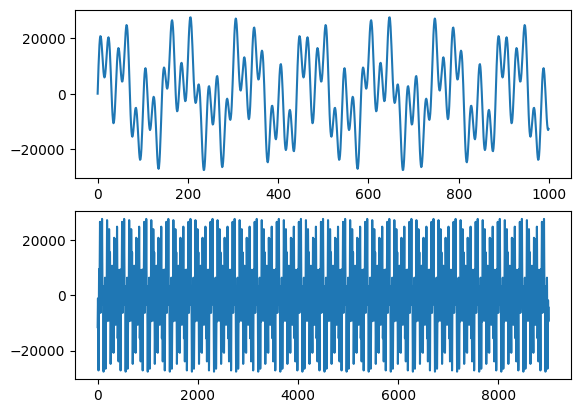

In [19]:
#fig, axs = plt.subplots(2)
#axs[0].plot(wav_data[:,0])
#axs[1].plot(wav_data[:,1])
fig, axs = plt.subplots(2)
axs[0].plot(wav_data[0:1000])
axs[1].plot(wav_data[1000:10000])
plt.show()

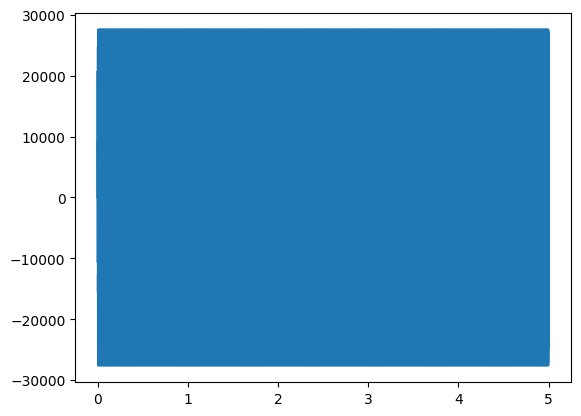

In [31]:
import numpy as np
fig, axs = plt.subplots(1)
duration = len(wav_data)/sr
x = np.linspace(0, duration, len(wav_data))
axs.plot(x, wav_data)
#axs[1].plot(x, wav_data[:,1]) # audio channel 1
plt.show()

/home/kevin/radio/work/audio-venv/lib64/python3.9/site-packages/matplotlib/axes/_axes.py:7774: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


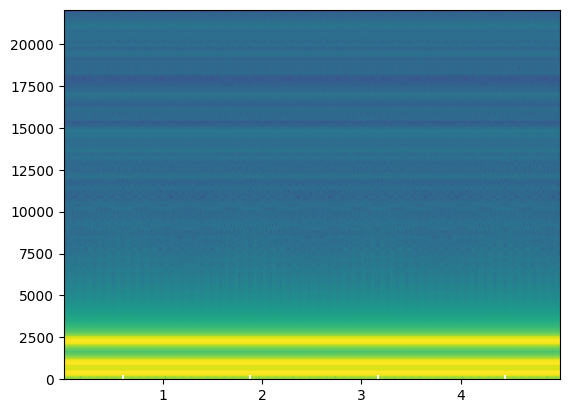

In [33]:
audio_data = wav_data[:]
plt.specgram(audio_data, Fs=sr)
plt.show()
display.Audio(audio_path)

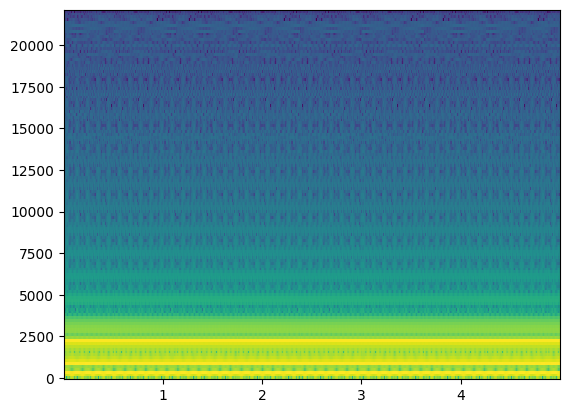

Column
    [0] HoloViews(Image, height=300, sizing_mode='fixed', width=600)
    [1] Audio(ndarray, throttle=500)

In [34]:
from scipy.signal import spectrogram
f, t, sxx = spectrogram(audio_data, sr)
plt.pcolormesh(t, f, np.log10(sxx))
plt.show()#hide_output
import holoviews as hv 
import panel as pn
hv.extension("bokeh", logo=False)

spec_gram = hv.Image((t, f, np.log10(sxx)), ["Time (s)", "Frequency (hz)"]).opts(width=600)
audio = pn.pane.Audio(audio_data, sample_rate=sr, name='Audio', throttle=500)
pn.Column(spec_gram, audio)

In [35]:
#hide_output
def update_playhead(time):
    return hv.VLine(time)

dmap_time = hv.DynamicMap(update_playhead, streams=[audio.param.time]).opts(width=600)
pn.Column(audio,
          spec_gram * dmap_time)

Column
    [0] Audio(ndarray, throttle=500)
    [1] HoloViews(DynamicMap, height=300, sizing_mode='fixed', width=600)

In [36]:
#collapse-show
def update_playhead(x,y,t):
    if x is None:
        return hv.VLine(t)
    else:
        audio.time = x
        return hv.VLine(x)

tap_stream = hv.streams.SingleTap(transient=True)
time_play_stream = hv.streams.Params(parameters=[audio.param.time], rename={'time': 't'})
dmap_time = hv.DynamicMap(update_playhead, streams=[time_play_stream, tap_stream])
out = pn.Column(audio,
                spec_gram * dmap_time)

In [41]:
#collapse_hide 
from scipy.signal import spectrogram
import holoviews as hv 
import panel as pn
from scipy.io import wavfile
hv.extension("bokeh", logo=False)

sr, wav_data = wavfile.read(audio_path)
audio_data = wav_data[:]
f, t, sxx = spectrogram(audio_data, sr)
spec_gram = hv.Image((t, f, np.log10(sxx)), ["Time (s)", "Frequency (hz)"]).opts(width=600)
audio = pn.pane.Audio(wav_data[:], sample_rate=sr, name='Audio', throttle=500)

def update_playhead(x,y,t):
    if x is None:
        return hv.VLine(t)
    else:
        audio.time = x
        return hv.VLine(x)

tap_stream = hv.streams.SingleTap(transient=True)
time_play_stream = hv.streams.Params(parameters=[audio.param.time], rename={'time': 't'})
dmap_time = hv.DynamicMap(update_playhead, streams=[time_play_stream, tap_stream])
out = pn.Column( audio, 
               (spec_gram * dmap_time))